In [1]:
import pandas as pd
import io
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt #to allow subplot creation
%matplotlib inline

import plotly.graph_objs as go
from plotly.offline import iplot
import plotly.express as px

import plotly.figure_factory as ff
import plotly.graph_objects as go
from tabulate import tabulate

from sklearn import tree # Import Tree Classifiers
from sklearn.ensemble import RandomForestClassifier # Import Random Forest Classifiers
from sklearn.model_selection import train_test_split,  RandomizedSearchCV # Import train_test_split function
from sklearn import metrics # Import scikit-learn metrics module for accuracy calculation
from sklearn.preprocessing import LabelEncoder
from scipy.stats import randint # Generate random numbers

In [2]:
import opendatasets as od
od.download("https://www.kaggle.com/datasets/rikdifos/credit-card-approval-prediction?select=application_record.csv")

Skipping, found downloaded files in ".\credit-card-approval-prediction" (use force=True to force download)


In [3]:
od.download("https://www.kaggle.com/datasets/rikdifos/credit-card-approval-prediction?select=credit_record.csv")

Skipping, found downloaded files in ".\credit-card-approval-prediction" (use force=True to force download)


In [4]:
df1 = pd.read_csv("credit-card-approval-prediction/application_record.csv")
df2 = pd.read_csv("credit-card-approval-prediction/credit_record.csv")

In [5]:
df1.head()

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
1,5008805,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
2,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,-21474,-1134,1,0,0,0,Security staff,2.0
3,5008808,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0
4,5008809,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0


In [6]:
df2.head(10)

,ID,MONTHS_BALANCE,STATUS
0,5001711,0,X
1,5001711,-1,0
2,5001711,-2,0
3,5001711,-3,0
4,5001712,0,C
5,5001712,-1,C
6,5001712,-2,C
7,5001712,-3,C
8,5001712,-4,C
9,5001712,-5,C


In [7]:
df1.count()

ID                     438557
CODE_GENDER            438557
FLAG_OWN_CAR           438557
FLAG_OWN_REALTY        438557
CNT_CHILDREN           438557
AMT_INCOME_TOTAL       438557
NAME_INCOME_TYPE       438557
NAME_EDUCATION_TYPE    438557
NAME_FAMILY_STATUS     438557
NAME_HOUSING_TYPE      438557
DAYS_BIRTH             438557
DAYS_EMPLOYED          438557
FLAG_MOBIL             438557
FLAG_WORK_PHONE        438557
FLAG_PHONE             438557
FLAG_EMAIL             438557
OCCUPATION_TYPE        304354
CNT_FAM_MEMBERS        438557
dtype: int64

<AxesSubplot:ylabel='Frequency'>

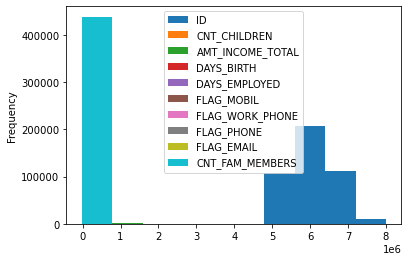

In [8]:
df1.plot.hist()

In [9]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 438557 entries, 0 to 438556
Data columns (total 18 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   ID                   438557 non-null  int64  
 1   CODE_GENDER          438557 non-null  object 
 2   FLAG_OWN_CAR         438557 non-null  object 
 3   FLAG_OWN_REALTY      438557 non-null  object 
 4   CNT_CHILDREN         438557 non-null  int64  
 5   AMT_INCOME_TOTAL     438557 non-null  float64
 6   NAME_INCOME_TYPE     438557 non-null  object 
 7   NAME_EDUCATION_TYPE  438557 non-null  object 
 8   NAME_FAMILY_STATUS   438557 non-null  object 
 9   NAME_HOUSING_TYPE    438557 non-null  object 
 10  DAYS_BIRTH           438557 non-null  int64  
 11  DAYS_EMPLOYED        438557 non-null  int64  
 12  FLAG_MOBIL           438557 non-null  int64  
 13  FLAG_WORK_PHONE      438557 non-null  int64  
 14  FLAG_PHONE           438557 non-null  int64  
 15  FLAG_EMAIL       

In [10]:
null_count = df1.isnull().sum().reset_index(name = "null count")
unique_valuecount = df1.nunique().reset_index(name = "unique value count")
datatypes = df1.dtypes.reset_index(name="types")
pd.set_option('display.max_rows', 500)
pd.concat([null_count, unique_valuecount , datatypes], axis=1).T.drop_duplicates().T

,index,null count,unique value count,types
0,ID,0,438510,int64
1,CODE_GENDER,0,2,object
2,FLAG_OWN_CAR,0,2,object
3,FLAG_OWN_REALTY,0,2,object
4,CNT_CHILDREN,0,12,int64
5,AMT_INCOME_TOTAL,0,866,float64
6,NAME_INCOME_TYPE,0,5,object
7,NAME_EDUCATION_TYPE,0,5,object
8,NAME_FAMILY_STATUS,0,5,object
9,NAME_HOUSING_TYPE,0,6,object


In [11]:
plt.rcParams['figure.facecolor'] = 'white'

In [12]:
apprecprocess=df1.copy()
credrecprocess=df2.copy()

In [13]:
apprecprocess['ID'].nunique()

438510

the total rows are 438,557. This means it has duplicates

In [14]:
apprecprocess = apprecprocess.drop_duplicates('ID', keep='last') 
# we identified that there are some duplicates in this dataset
# we will be deleting those duplicates and will keep the last entry of the ID if its repeated.

In [15]:
credrecprocess.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 3 columns):
 #   Column          Non-Null Count    Dtype 
---  ------          --------------    ----- 
 0   ID              1048575 non-null  int64 
 1   MONTHS_BALANCE  1048575 non-null  int64 
 2   STATUS          1048575 non-null  object
dtypes: int64(2), object(1)
memory usage: 24.0+ MB


In [16]:
credrecprocess['ID'].nunique() 

45985

this has around 46,000 unique rows as there are repeating entries for different monthly values and status.

In [17]:
# checking to see how many records match in two datasets
len(set(credrecprocess['ID']).intersection(set(apprecprocess['ID']))) 

36457

In [18]:
# find all users' account open month.
begin_month=pd.DataFrame(credrecprocess.groupby(["ID"])["MONTHS_BALANCE"].agg(min))
begin_month=begin_month.rename(columns={'MONTHS_BALANCE':'begin_month'}) 
appcredmergedata=pd.merge(apprecprocess,begin_month,how="left",on="ID") #merge to record data
appcredmergedata.head(3)

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,begin_month
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0,-15.0
1,5008805,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0,-14.0
2,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,-21474,-1134,1,0,0,0,Security staff,2.0,-29.0


In [19]:
credrecprocess['STATUS'].nunique() 

8

As per the data dictionary, following values are expected in status columns : 0: 1-29 days past due 1: 30-59 days past due 2: 60-89 days overdue 3: 90-119 days overdue 4: 120-149 days overdue 5: Overdue or bad debts, write-offs for more than 150 days C: paid off that month X: No loan for the month

In [20]:
#Creating a new column and considering all candidates with overdue as more than 90 days as possible risk
credrecprocess['targetrisk'] = None
credrecprocess['targetrisk'][credrecprocess['STATUS'] =='3']='Yes' 
credrecprocess['targetrisk'][credrecprocess['STATUS'] =='4']='Yes' 
credrecprocess['targetrisk'][credrecprocess['STATUS'] =='5']='Yes'
credrecprocess.head()

,ID,MONTHS_BALANCE,STATUS,targetrisk
0,5001711,0,X,None
1,5001711,-1,0,None
2,5001711,-2,0,None
3,5001711,-3,0,None
4,5001712,0,C,None


In [21]:
credrecprocess1=credrecprocess.groupby('ID').count()
credrecprocess1['targetrisk'][credrecprocess1['targetrisk'] > 0]='Yes' 
credrecprocess1['targetrisk'][credrecprocess1['targetrisk'] == 0]='No' 
credrecprocess1 = credrecprocess1[['targetrisk']]
credrecprocess1.head(3)

,targetrisk
ID,
5001711,No
5001712,No
5001713,No


In [22]:
# Merge  status with the main record dataframe where targetrisk = yes will get converted to 1 and No as 0 to avoid label encoding in future.
appcredmergedata=pd.merge(appcredmergedata,credrecprocess1,how='inner',on='ID')
appcredmergedata['targetrisk']=appcredmergedata['targetrisk']
appcredmergedata.loc[appcredmergedata['targetrisk']=='Yes','targetrisk']=1
appcredmergedata.loc[appcredmergedata['targetrisk']=='No','targetrisk']=0

In [23]:
appcredmergedata.head()

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,begin_month,targetrisk
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0,-15.0,0
1,5008805,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0,-14.0,0
2,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,-21474,-1134,1,0,0,0,Security staff,2.0,-29.0,0
3,5008808,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0,-4.0,0
4,5008809,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0,-26.0,0


In [24]:
print(appcredmergedata['targetrisk'].value_counts())
appcredmergedata['targetrisk'].value_counts(normalize=True)

0    36155
1      302
Name: targetrisk, dtype: int64


0    0.991716
1    0.008284
Name: targetrisk, dtype: float64

only records are at risk , which is low though it is also important to understand the factors affecting it and this can be associated with high numbers in terms of amount as well 

## Feature Engineering

In [25]:
dfprocess=appcredmergedata.copy()

In [26]:
dfprocess.rename(columns={'CODE_GENDER':'Gender','FLAG_OWN_CAR':'OwnCar','FLAG_OWN_REALTY':'OwnReality',
                         'CNT_CHILDREN':'ChildCount','AMT_INCOME_TOTAL':'AnnualIncome',
                         'NAME_EDUCATION_TYPE':'EducationType','NAME_FAMILY_STATUS':'FamilyStatus',
                        'NAME_HOUSING_TYPE':'HousingType','FLAG_EMAIL':'EmailFlag',
                         'NAME_INCOME_TYPE':'IncomeType','FLAG_WORK_PHONE':'WorkPhoneFlag',
                         'FLAG_PHONE':'PhoneFlag','CNT_FAM_MEMBERS':'FamilySize',
                        'OCCUPATION_TYPE':'OccupationType',
                          'DAYS_BIRTH':'DaysBirth' , 'DAYS_EMPLOYED':'DaysEmployed' , 'FLAG_MOBIL': 'MobileFlag'
                        },inplace=True)

In [27]:
dfprocess.head(2)

,ID,Gender,OwnCar,OwnReality,ChildCount,AnnualIncome,IncomeType,EducationType,FamilyStatus,HousingType,DaysBirth,DaysEmployed,MobileFlag,WorkPhoneFlag,PhoneFlag,EmailFlag,OccupationType,FamilySize,begin_month,targetrisk
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0,-15.0,0
1,5008805,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0,-14.0,0


##### Gender

In [28]:
dfprocess['Gender'].unique() 

array(['M', 'F'], dtype=object)

Here Gender has only 2 values hence easy to convert this to numeric value for model training and also, we will be converting this to type integer

In [29]:
dfprocess['Gender'] = dfprocess['Gender'].replace(['F','M'],[0,1])

In [30]:
dfprocess['Gender']=dfprocess['Gender'].astype('int64')

##### Having a car or not

In [31]:
dfprocess['OwnCar'].unique() 

array(['Y', 'N'], dtype=object)

In [32]:
dfprocess['OwnCar'] = dfprocess['OwnCar'].replace(['N','Y'],[0,1])
dfprocess['OwnCar']=dfprocess['OwnCar'].astype('int64')

Here we have encoded N and Y as 0 and 1 respectively and converted the column into Integer type 

Similar to owncar column, OwnReality column will be updated

In [33]:
dfprocess['OwnReality'] = dfprocess['OwnReality'].replace(['N','Y'],[0,1])
dfprocess['OwnReality']=dfprocess['OwnReality'].astype('int64')

In [34]:
print(dfprocess['PhoneFlag'].value_counts())
dfprocess['PhoneFlag'].value_counts(normalize=True)

0    25709
1    10748
Name: PhoneFlag, dtype: int64


0    0.705187
1    0.294813
Name: PhoneFlag, dtype: float64

In [35]:
print(dfprocess['EmailFlag'].value_counts())
dfprocess['EmailFlag'].value_counts(normalize=True)

0    33186
1     3271
Name: EmailFlag, dtype: int64


0    0.910278
1    0.089722
Name: EmailFlag, dtype: float64

In [36]:
print(dfprocess['WorkPhoneFlag'].value_counts())
dfprocess['WorkPhoneFlag'].value_counts(normalize=True)

0    28235
1     8222
Name: WorkPhoneFlag, dtype: int64


0    0.774474
1    0.225526
Name: WorkPhoneFlag, dtype: float64

In [37]:
print(dfprocess['MobileFlag'].value_counts())
dfprocess['MobileFlag'].value_counts(normalize=True)

1    36457
Name: MobileFlag, dtype: int64


1    1.0
Name: MobileFlag, dtype: float64

### Continuous Variables

In [38]:
dfprocess['ChildCount'].value_counts(normalize=True)

0     0.691253
1     0.205502
2     0.089311
3     0.011493
4     0.001728
5     0.000549
14    0.000082
7     0.000055
19    0.000027
Name: ChildCount, dtype: float64

Here the percentage of child count more than 2 is pretty low hence we will club them together

In [39]:
dfprocess.loc[dfprocess['ChildCount'] >= 2,'ChildCount']='2More'
dfprocess['ChildCount'].value_counts()

0        25201
1         7492
2More     3764
Name: ChildCount, dtype: int64

(2.544, 18.18]      22460
(18.18, 33.66]      11380
(33.66, 49.14]       2099
(49.14, 64.62]        274
(64.62, 80.1]         165
(80.1, 95.58]          58
(95.58, 111.06]         4
(111.06, 126.54]        3
(126.54, 142.02]        6
(142.02, 157.5]         8
Name: AnnualIncome, dtype: int64


<AxesSubplot:ylabel='Frequency'>

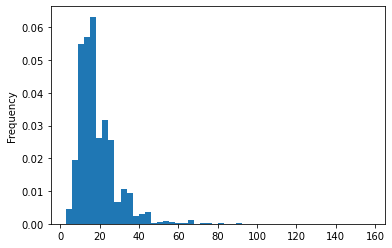

In [40]:
# Categorizing annual incode in bins 
#dfprocess['AnnualIncome']=dfprocess['AnnualIncome'].astype(object)
dfprocess['AnnualIncome'] = dfprocess['AnnualIncome']/10000 
print(dfprocess['AnnualIncome'].value_counts(bins=10,sort=False))
dfprocess['AnnualIncome'].plot(kind='hist',bins=50,density=True)

In [41]:
dfprocess1=dfprocess.copy()

Reference: https://stackoverflow.com/questions/30211923/what-is-the-difference-between-pandas-qcut-and-pandas-cut

In [42]:
def createbins(dataframe, column_name, label_texts, option):
    # Create a new column to store the bin labels
    bin_column_name = column_name + '_bin'
    
    if option == 'quantile':
        dataframe[bin_column_name] = pd.qcut(dataframe[column_name], q=len(label_texts), labels=label_texts)
    elif option == 'equal-length':
        dataframe[bin_column_name] = pd.cut(dataframe[column_name], bins=len(label_texts), labels=label_texts)
    else:
        raise ValueError("Invalid option. Please choose either 'quantile' or 'equal-length'.")
    
    return dataframe


In [43]:
#option = 'quantile'  # or 'equal-length'
dfprocess1 = createbins(dfprocess1,'AnnualIncome', ["low","medium", "high"], 'quantile')

In [44]:
dfprocess1['AnnualIncome_bin'].value_counts()

low       14473
high      11282
medium    10702
Name: AnnualIncome_bin, dtype: int64

Days_Birth / Age

(19.951, 24.8]    0.020243
(24.8, 29.6]      0.114930
(29.6, 34.4]      0.139836
(34.4, 39.2]      0.146419
(39.2, 44.0]      0.140796
(44.0, 48.8]      0.094166
(48.8, 53.6]      0.109444
(53.6, 58.4]      0.106948
(58.4, 63.2]      0.091286
(63.2, 68.0]      0.035933
Name: Age, dtype: float64


<AxesSubplot:ylabel='Frequency'>

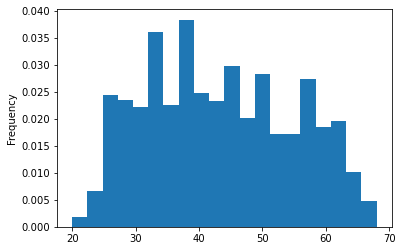

In [47]:
dfprocess1['Age']=-(dfprocess1['DaysBirth'])//365
print(dfprocess1['Age'].value_counts(bins=10,normalize=True,sort=False))
dfprocess1['Age'].plot(kind='hist',bins=20,density=True)

In [67]:
dfprocess2=dfprocess1.copy()

In [68]:
#option = 'quantile'  # or 'equal-length'
dfprocess2 = createbins(dfprocess2,'Age', ["0-20","20-40", "40-60","60-80"], 'equal-length')

In [69]:
dfprocess2['Age_bin'].value_counts()

20-40    12582
40-60     9737
0-20      7915
60-80     6223
Name: Age_bin, dtype: int64

<AxesSubplot:ylabel='Frequency'>

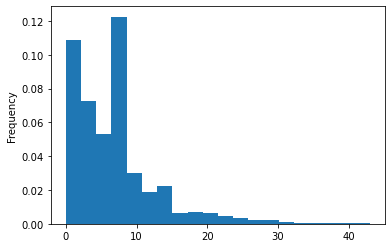

In [70]:
dfprocess2['YearsEmployed']=-(dfprocess2['DaysEmployed'])//365
dfprocess2[dfprocess2['YearsEmployed']<0] = np.nan # replace by na
dfprocess2['YearsEmployed'].fillna(dfprocess2['YearsEmployed'].mean(),inplace=True) #replace na by mean
dfprocess2['YearsEmployed'].plot(kind='hist',bins=20,density=True)

In [71]:
#option = 'quantile'  # or 'equal-length'
dfprocess2 = createbins(dfprocess2,'YearsEmployed', ["0-15","15-30", "30-45","45-60"], 'equal-length')

In [72]:
dfprocess2['YearsEmployed_bin'].value_counts()

0-15     30419
15-30     4775
30-45     1087
45-60      176
Name: YearsEmployed_bin, dtype: int64

Family Size

In [73]:
dfprocess2['FamilySize'].value_counts(sort=False)

2.0     15389
1.0      5151
5.0       387
3.0      6255
4.0      3057
6.0        58
15.0        3
7.0        19
20.0        1
9.0         2
Name: FamilySize, dtype: int64

In [74]:
dfprocess2['FamilySizeGroup']=dfprocess2['FamilySize']
dfprocess2.loc[dfprocess2['FamilySizeGroup']>=3,'FamilySizeGroup']='3more'
dfprocess2['FamilySizeGroup'].value_counts(sort=False)

2.0      15389
1.0       5151
3more     9782
Name: FamilySizeGroup, dtype: int64

In [75]:
dfprocess2['FamilySizeGroup']=dfprocess2['FamilySizeGroup'].astype(object)

### Categorial Data

In [77]:
dfprocess3=dfprocess2.copy()

In [78]:
dfprocess3['IncomeType'].value_counts(sort=False)

Working                 18819
Commercial associate     8490
State servant            2985
Student                    11
Pensioner                  17
Name: IncomeType, dtype: int64

In [80]:
dfprocess3.loc[dfprocess3['IncomeType']=='Pensioner','IncomeType']='State servant'
dfprocess3.loc[dfprocess3['IncomeType']=='Student','IncomeType']='State servant'
dfprocess3['IncomeType'].value_counts(sort=False)

Working                 18819
Commercial associate     8490
State servant            3013
Name: IncomeType, dtype: int64

In [81]:
dfprocess3['OccupationType'].value_counts(sort=False)

Security staff            592
Sales staff              3485
Accountants              1241
Laborers                 6211
Managers                 3012
Drivers                  2138
Core staff               3591
High skill tech staff    1383
Cleaning staff            551
Private service staff     344
Cooking staff             655
Low-skill Laborers        175
Medicine staff           1207
Secretaries               151
Waiters/barmen staff      174
HR staff                   85
Realty agents              79
IT staff                   60
Name: OccupationType, dtype: int64

there is a wide variation in this field , hence will keep it as it is for now. may group it at later point

In [83]:
dfprocess3['HousingType'].value_counts(sort=False)

Rented apartment         545
House / apartment      26653
Municipal apartment      951
With parents            1771
Co-op apartment          160
Office apartment         242
Name: HousingType, dtype: int64

In [84]:
dfprocess3['EducationType'].value_counts(sort=False)

Higher education                  8858
Secondary / secondary special    19867
Incomplete higher                 1352
Lower secondary                    214
Academic degree                     31
Name: EducationType, dtype: int64

In [86]:
dfprocess3['FamilyStatus'].value_counts(sort=False)

Civil marriage           2575
Married                 21137
Single / not married     4148
Separated                1758
Widow                     704
Name: FamilyStatus, dtype: int64

In [88]:
ot = pd.DataFrame(dfprocess3.dtypes =='object').reset_index()
object_type = ot[ot[0] == True]['index']
object_type

4          ChildCount
6          IncomeType
7       EducationType
8        FamilyStatus
9         HousingType
16     OccupationType
19         targetrisk
25    FamilySizeGroup
Name: index, dtype: object

In [89]:
num_type = pd.DataFrame(dfprocess3.dtypes != 'object').reset_index().rename(columns =  {0:'yes/no'})
num_type = num_type[num_type['yes/no'] ==True]['index']
num_type

0                    ID
1                Gender
2                OwnCar
3            OwnReality
5          AnnualIncome
10            DaysBirth
11         DaysEmployed
12           MobileFlag
13        WorkPhoneFlag
14            PhoneFlag
15            EmailFlag
17           FamilySize
18          begin_month
20     AnnualIncome_bin
21                  Age
22              Age_bin
23        YearsEmployed
24    YearsEmployed_bin
Name: index, dtype: object

In [90]:
dfprocessM1=dfprocess3.copy()

In [91]:
#Converting categorial variables into Dummy / indicator variable
dfprocessM1 = pd.get_dummies(dfprocessM1)
dfprocessM1.shape

C:\Users\shari\anaconda3\lib\site-packages\pandas\core\algorithms.py:798: FutureWarning:

In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)



(36457, 71)

In [92]:
dfprocessM1=dfprocessM1.dropna().reset_index(drop=True)

In [ ]:
y=dfprocessM1.TARGET
X=dfprocessM1.drop(columns=['TARGET'])

#@title Splitting dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1) # 70% training and 30% test

In [85]:
dfprocess3.head(2)

,ID,Gender,OwnCar,OwnReality,ChildCount,AnnualIncome,IncomeType,EducationType,FamilyStatus,HousingType,...,OccupationType,FamilySize,begin_month,targetrisk,AnnualIncome_bin,Age,Age_bin,YearsEmployed,YearsEmployed_bin,FamilySizeGroup
0,5008804.0,1.0,1.0,1.0,0,42.75,Working,Higher education,Civil marriage,Rented apartment,...,NaN,2.0,-15.0,0,high,32.0,0-20,12.0,15-30,2.0
1,5008805.0,1.0,1.0,1.0,0,42.75,Working,Higher education,Civil marriage,Rented apartment,...,NaN,2.0,-14.0,0,high,32.0,0-20,12.0,15-30,2.0


In [87]:
dfprocess3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 36457 entries, 0 to 36456
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   ID                 30322 non-null  float64 
 1   Gender             30322 non-null  float64 
 2   OwnCar             30322 non-null  float64 
 3   OwnReality         30322 non-null  float64 
 4   ChildCount         30322 non-null  object  
 5   AnnualIncome       30322 non-null  float64 
 6   IncomeType         30322 non-null  object  
 7   EducationType      30322 non-null  object  
 8   FamilyStatus       30322 non-null  object  
 9   HousingType        30322 non-null  object  
 10  DaysBirth          30322 non-null  float64 
 11  DaysEmployed       30322 non-null  float64 
 12  MobileFlag         30322 non-null  float64 
 13  WorkPhoneFlag      30322 non-null  float64 
 14  PhoneFlag          30322 non-null  float64 
 15  EmailFlag          30322 non-null  float64 
 16  Occu